In [1]:
# gets S, N=iters count, u=rand, code G, modulation (x), y (sigma = f(S))
# decoder iters all G rows, gets first in euclid
# get Greaph P(err) of S
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

plt.style.use('dark_background')

%matplotlib inline

In [2]:
vectors = \
    [[1,1,1,1,1,1,1,1],
     [1,1,1,1,0,0,0,0],
     [1,1,0,0,1,1,0,0],
     [1,0,1,0,1,0,1,0]]
G = np.array(vectors)
H = np.array(
    [[1,1,1,1,0,0,0,0],
     [1,1,0,0,1,1,0,0],
     [1,0,1,0,1,0,1,0],
     [0,1,1,0,1,0,0,1]])
assert np.all((G @ H.T % 2) == 0)

In [3]:
def genVectors(i, to, v):
    if i == to:
        yield np.array(v)
    else:
        yield from genVectors(i+1, to, v+[0])
        yield from genVectors(i+1, to, v+[1])
allVectors = [(i, i @ G % 2) for i in genVectors(0, 4, [])]
findVectors = [i[1] * 2 - 1 for i in allVectors]
dister = spatial.KDTree(findVectors)
def getClosest(a):
    return allVectors[dister.query(a)[1]][0]


In [4]:
def runOnce(S):
    # Ec равна 1, тогда S = 10log10(Ec/N0), где N0 = 2*sigma^2
    # S = 10log_10(1/(2sigma^2))
    # 10^(S/10) = 1/(2sigma^2)
    # sigma^2 = 1/(2*10^(S/10))
    sigma = np.sqrt(1/(2*10**(S/10)))
    
    # sigma = np.sqrt(10**(S/10)/2)
    
    # S = 1/(2sigma^2)
    # sigma = sqrt(1/S)
    # sigma = np.sqrt(1/S)
    # sigma = np.sqrt(1/2/10**S)
    res = 0
    
    # u = np.random.randint(2, size=4)
    for u, _ in allVectors:
        c = u @ G % 2
        x = c * 2 - 1
        y = x + np.random.normal(np.zeros(x.shape), np.ones(x.shape) * sigma)
        ans = getClosest(y)
        res += np.all(u == ans)
    return res

In [5]:
def runIters(S, iters):
    ok = 0
    for i in range(iters):
        ok += runOnce(S)
    return ok / iters / len(allVectors)

In [8]:
%%time
xs = []
ys = []
# Ss = np.arange(-0.6, 0.61, 0.01) # [10 ** i for i in range(-10, 1)] + [i for i in range(2, 40)]
Ss = np.arange(-10, 10, 1)
Ss.sort()
for S in Ss:
    xs.append(S)
    ys.append(runIters(S, 1000))

CPU times: user 33.1 s, sys: 9.84 ms, total: 33.2 s
Wall time: 33.3 s


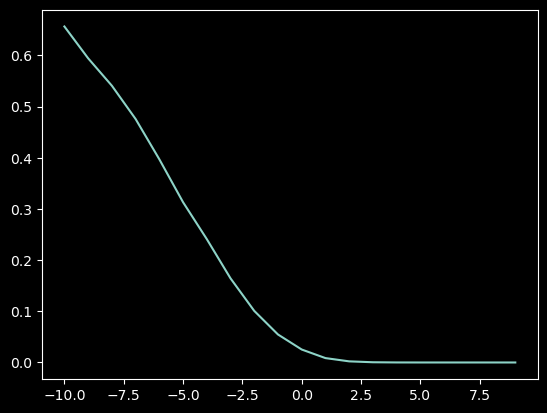

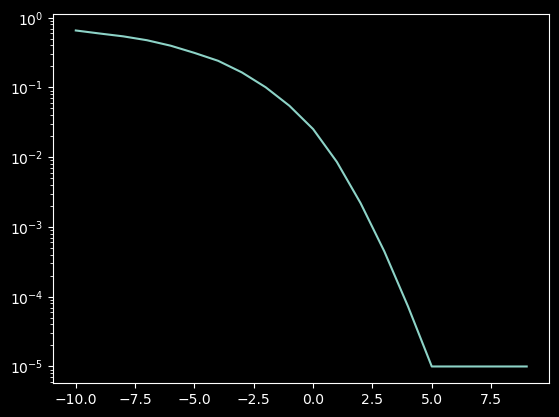

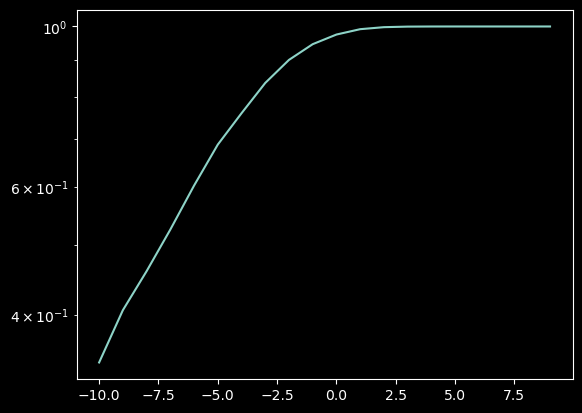

In [10]:
plt.plot(xs, 1-np.array(ys))
plt.show()

plt.yscale('log')
plt.plot(xs, 1.00001-np.array(ys))
plt.show()
plt.yscale('log')
plt.plot(xs, np.array(ys))
plt.show()